In [178]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import json

In [164]:
# def binaryImg(pixelmin=0,pixelmax=80,kernel=2,iterations=3):
#     for img in img_list:
#         Gimg = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#         npImg = np.array(Gimg)
#         npImg[(npImg<pixelmax)&(npImg>pixelmin)] = 255
#         npImg[npImg<255] = 0
#         mask = cv.erode(npImg.astype('uint8'), kernel=np.ones((kernel,kernel)),iterations=iterations)
#         cv.imwrite("./result/all_maskFile/{}.png".format(rec_id+character_id),mask)

In [11]:
'''
显示图片
输入：图片矩阵，画布大小：元组（宽，高）
'''
def showImg(img,figsize=(4,4),cmap = None):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img,cmap = cmap)
    plt.show()

In [62]:
# #读取文件夹下的所有图片
# img_list = []
# directory_name = "./result/all_rotate_result_white/"
# for filename in os.listdir(directory_name):
#     img = cv.imread(directory_name+filename) 
#     #img=cv2.imread('F:cat.jpg',0)flag默认为1，即读取为彩色图像，如果要读取为灰度图（单通道），只需要把flag修改为为0即可。可直接读取灰度图
#     img_list.append(img)
# #将图片转化为灰度图
# Gimg_list = []
# for img in img_list:
#     Gimg = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#     Gimg_list.append(Gimg)

In [110]:
#读取文件夹下的所有图片
Gcropimg_list = []
directory_name = "./result/all_cropped_result/"
for filename in os.listdir(directory_name):
    img = cv.imread(directory_name+filename,0) 
    #img=cv2.imread('F:cat.jpg',0)flag默认为1，即读取为彩色图像，如果要读取为灰度图（单通道），只需要把flag修改为为0即可。可直接读取灰度图
    Gcropimg_list.append(img)

In [168]:
'''
读取文件夹下所有图片，将其二值化
高斯核去掉噪音，然后使用OTSU算法二值化，再写入文件夹中
输入：读取文件夹的名称，写入文件夹的名称
输出：二值化之后的图像
'''
def binary_img(directory_name,Wdirectory_name):
    Gimg_list = []
    for filename in os.listdir(directory_name):
        img = cv.imread(directory_name+filename,0) 
        #img=cv2.imread('F:cat.jpg',0)flag默认为1，即读取为彩色图像，如果要读取为灰度图（单通道），只需要把flag修改为为0即可。可直接读取灰度图
        blur = cv.GaussianBlur(img,(5,5),0)
        ret,thImg = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)  
        mask = cv.erode(thImg.astype('uint8'), kernel=np.ones((3,3)))
        Gimg_list.append(mask)
        cv.imwrite(Wdirectory_name+filename,mask)
    return Gimg_list

In [169]:
directory_name = "./result/all_rotate_result_big/"
Wdirectory_name = "./result/all_mask_big/"
mask_list = binary_img(directory_name,Wdirectory_name)

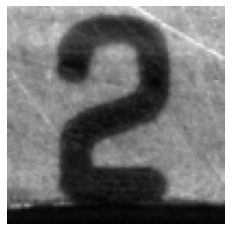

In [145]:
temp = random.randint(0,len(Gimg_list))
tempimg = Gimg_list[temp]
showImg(tempimg,cmap = "gray")

In [146]:
tempimg.shape

(100, 100)

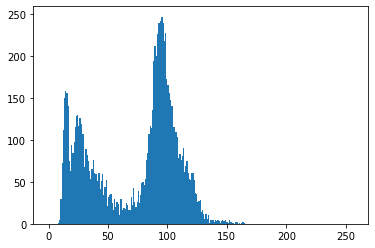

In [147]:
plt.hist(tempimg.ravel(),256,[0,256]) #ravel函数可以将其展平为一维数组，256表示条形bin的个数，【0，256】表示展示的统计范围
plt.show()

In [183]:
'''
获取指定图像路径
输入：所有的图片标注数据（包括图片id，同心圆，框框点坐标）：json文件，图片的id ：字符串
输出：查找图片的圆心坐标：形式[x,y]
'''
def getImgpath(imgtotalData,img_id):
    image_path = ""
    for item in imgtotalData['record']:
        if(item['info']['uuid']==img_id):
            image_path = item['info']['image_path']
            break
    return image_path

In [182]:
with open('./labeled_giant_data.json') as f:
    imgtotalData = json.load(f)

In [187]:
filename = "01b4b222c5d611eba414977232ebdff5_8ac45706c7f911eb83eeea1702ca848e.png"
Findex = filename.find('_')
img_id = filename[0:Findex]
image_path = getImgpath(imgtotalData,img_id) #得到圆中心点
image_data_root = 'F:/mountMl_fan/bearing/'
image_path = image_data_root + image_path
img = cv.imread(image_path)

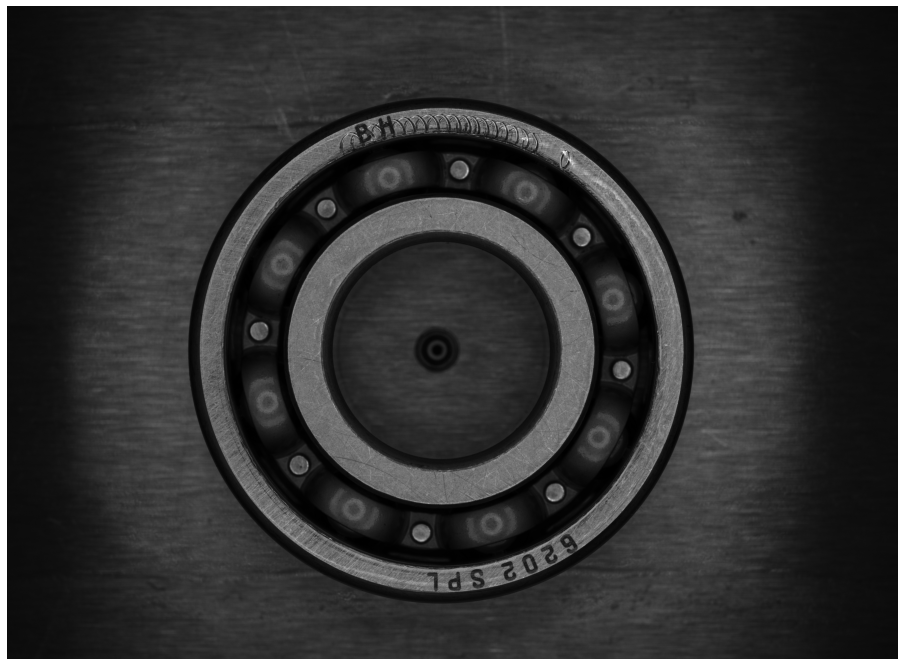

In [190]:
showImg(img,figsize=(16,12))

In [191]:
filename = "1aa35964c5d611eba414977232ebdff5_8aa8a076c7f911ebb69fea1702ca848e.png"
Findex = filename.find('_')
img_id = filename[0:Findex]
image_path = getImgpath(imgtotalData,img_id) #得到圆中心点
image_data_root = 'F:/mountMl_fan/bearing/'
image_path = image_data_root + image_path
img = cv.imread(image_path)

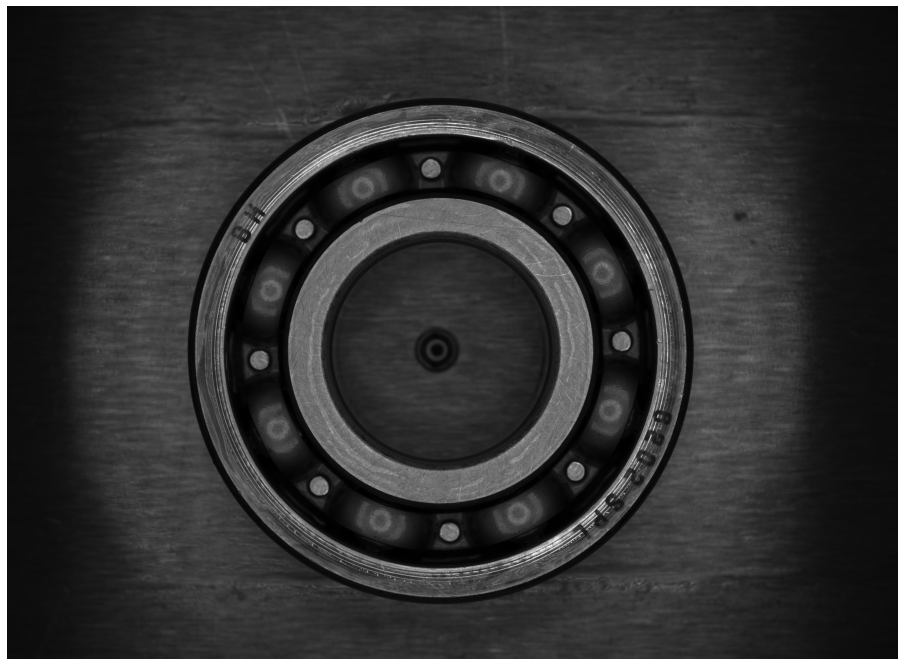

In [192]:
showImg(img,figsize=(16,12))

In [165]:
# #不太适用
# #adaptiveThreshold自适应阈值二值化
# img_MEAN_binary = cv.adaptiveThreshold(tempimg,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,13,5)
# showImg(img_MEAN_binary,cmap = "gray")